In [ ]:
# a. Data cleaning - df.dropna(), df.drop_duplicates()
# b. Data integration - pd.concat([df1,df2])
# c. Data transformation - df.sort_values() ,df.transpose()
# d. Error correcting - pd.to_numeric(df[''],errors='coerce')
# e. Data model building


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd

In [ ]:
ds =pd.read_csv("/content/drive/MyDrive/TE_ACADEMICS/DSBDA/DATASETS/IndiaAirQualityData.csv", encoding="ISO-8859-1")

In [ ]:
ds.head()

In [ ]:
ds.info()

In [ ]:
ds.info()

# **DATA CLEANING**

In [ ]:
ds.isnull().sum()

In [ ]:
ds.dropna()

In [ ]:
ds.info()

# **DATA INTEGRATION**

In [ ]:
ds1 = ds[['state','location','so2','rspm']].loc[1:10]

In [ ]:
ds1

In [ ]:
ds2 = ds[['state','location','so2','rspm']].loc[11:20]

In [ ]:
ds_integration = pd.concat([ds1,ds2])

In [ ]:
ds_integration

# **DATA TRANSFORMATION**

In [ ]:
ds_integration.transpose()

# **ERROR_CORRECTION**

In [ ]:
ds.head()

In [ ]:
ds.drop(columns='so2')

In [ ]:
ds2

In [ ]:
ds2.drop(11)

In [ ]:
ds['state'] = ds['state'].str.lower()

In [ ]:
ds


In [ ]:
ds['state'] = ds['state'].str.strip()

In [ ]:
ds

In [ ]:
ds['rspm'] = ds['rspm'].clip(lower=50,upper=150)

In [ ]:
ds

# **DATA MODEL BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dss = ds[['so2','no2']]

In [ ]:
dss.head()

so2   no2
0  4.8  17.4
1  3.1   7.0
2  6.2  28.5
3  6.3  14.7
4  4.7   7.5

In [ ]:
dss.isnull().sum()

so2    34646
no2    16233
dtype: int64

In [ ]:
dss = dss.dropna()

In [ ]:
dss.isnull().sum()

so2    0
no2    0
dtype: int64

In [ ]:
x = dss[['so2']]

In [ ]:
y = dss['no2']

In [ ]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y)

In [ ]:
xtrain


so2
168903   7.3
359949   8.0
341870   6.0
428093  17.0
8685     4.1
...      ...
331335   5.2
99284   11.0
415728   5.3
27569    6.5
245466  10.0

[299322 rows x 1 columns]

In [ ]:
xtest

so2
330924   5.500
389967   9.015
310504   6.000
294217  16.000
88103    9.400
...        ...
226881  28.000
12466   15.000
44424    7.000
53389    2.000
233366  12.000

[99775 rows x 1 columns]

In [ ]:
ytrain

168903    29.2
359949    39.0
341870    27.0
428093    73.0
8685      28.0
          ... 
331335    20.4
99284     18.0
415728    36.7
27569     13.5
245466    10.0
Name: no2, Length: 299322, dtype: float64

In [ ]:
ytest

330924    35.000000
389967    38.163333
310504    30.000000
294217    48.000000
88103     17.200000
            ...    
226881    40.000000
12466     29.000000
44424     15.000000
53389     21.200000
233366    34.000000
Name: no2, Length: 99775, dtype: float64

In [ ]:
from sklearn import linear_model


In [ ]:
regression = linear_model.LinearRegression()

In [ ]:
model = regression.fit(xtrain,ytrain)

In [ ]:
y_pred = model.predict(xtest)

In [ ]:
print(y_pred,sep="\n")

[23.22344682 25.17341311 23.50082467 ... 24.05558037 21.28180186
 26.82935887]


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ytest = ytest//1

In [ ]:
print(ytest)

330924    35.0
389967    38.0
310504    30.0
294217    48.0
88103     17.0
          ... 
226881    40.0
12466     29.0
44424     15.0
53389     21.0
233366    34.0
Name: no2, Length: 99775, dtype: float64


In [ ]:
y_pred = y_pred//1

In [ ]:
score =accuracy_score( ytest,y_pred)
print(score)

0.02542721122525683


# **TESTING**

In [ ]:
ds

stn_code       sampling_date                        state   location  \
0         150.0  February - M021990               andhra pradesh  Hyderabad   
1         151.0  February - M021990               andhra pradesh  Hyderabad   
2         152.0  February - M021990               andhra pradesh  Hyderabad   
3         150.0     March - M031990               andhra pradesh  Hyderabad   
4         151.0     March - M031990               andhra pradesh  Hyderabad   
...         ...                 ...                          ...        ...   
435737     SAMP            24-12-15                  west bengal   ULUBERIA   
435738     SAMP            29-12-15                  west bengal   ULUBERIA   
435739      NaN                 NaN  andaman-and-nicobar-islands        NaN   
435740      NaN                 NaN                  lakshadweep        NaN   
435741      NaN                 NaN                      tripura        NaN   

                                           agency  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
...                                           ...   
435737  West Bengal State Pollution Control Board   
435738  West Bengal State Pollution Control Board   
435739                                        NaN   
435740                                        NaN   
435741                                        NaN   

                                      type   so2   no2   rspm  spm  \
0       Residential, Rural and other Areas   4.8  17.4    NaN  NaN   
1                          Industrial Area   3.1   7.0    NaN  NaN   
2       Residential, Rural and other Areas   6.2  28.5    NaN  NaN   
3       Residential, Rural and other Areas   6.3  14.7    NaN  NaN   
4                          Industrial Area   4.7   7.5    NaN  NaN   
...                                    ...   ...   ...    ...  ...   
435737                               RIRUO  22.0  50.0  143.0  NaN   
435738                               RIRUO  20.0  46.0  150.0  NaN   
435739                                 NaN   NaN   NaN    NaN  NaN   
435740                                 NaN   NaN   NaN    NaN  NaN   
435741                                 NaN   NaN   NaN    NaN  NaN   

              location_monitoring_station  pm2_5        date  
0                                     NaN    NaN  1990-02-01  
1                                     NaN    NaN  1990-02-01  
2                                     NaN    NaN  1990-02-01  
3                                     NaN    NaN  1990-03-01  
4                                     NaN    NaN  1990-03-01  
...                                   ...    ...         ...  
435737  Inside Rampal Industries,ULUBERIA    NaN  2015-12-24  
435738  Inside Rampal Industries,ULUBERIA    NaN  2015-12-29  
435739                                NaN    NaN         NaN  
435740                                NaN    NaN         NaN  
435741                                NaN    NaN         NaN  

[435742 rows x 13 columns]

In [ ]:
ds_1 = ds[['stn_code','sampling_date']].loc[0:5]

In [ ]:
ds_1

stn_code       sampling_date
0    150.0  February - M021990
1    151.0  February - M021990
2    152.0  February - M021990
3    150.0     March - M031990
4    151.0     March - M031990
5    152.0     March - M031990

In [ ]:
ds_2 = ds[['state','location']].loc[0:5]

In [ ]:
ds_2


state   location
0  andhra pradesh  Hyderabad
1  andhra pradesh  Hyderabad
2  andhra pradesh  Hyderabad
3  andhra pradesh  Hyderabad
4  andhra pradesh  Hyderabad
5  andhra pradesh  Hyderabad

In [ ]:
ds_columnwise_merged= pd.concat([ds_1,ds_2],axis=1)

In [ ]:
ds_columnwise_merged

stn_code       sampling_date           state   location
0    150.0  February - M021990  andhra pradesh  Hyderabad
1    151.0  February - M021990  andhra pradesh  Hyderabad
2    152.0  February - M021990  andhra pradesh  Hyderabad
3    150.0     March - M031990  andhra pradesh  Hyderabad
4    151.0     March - M031990  andhra pradesh  Hyderabad
5    152.0     March - M031990  andhra pradesh  Hyderabad

In [ ]:
ds_rowwise_merged= pd.concat([ds_1,ds_2],axis=0)

In [ ]:
ds_rowwise_merged

stn_code       sampling_date           state   location
0    150.0  February - M021990             NaN        NaN
1    151.0  February - M021990             NaN        NaN
2    152.0  February - M021990             NaN        NaN
3    150.0     March - M031990             NaN        NaN
4    151.0     March - M031990             NaN        NaN
5    152.0     March - M031990             NaN        NaN
0      NaN                 NaN  andhra pradesh  Hyderabad
1      NaN                 NaN  andhra pradesh  Hyderabad
2      NaN                 NaN  andhra pradesh  Hyderabad
3      NaN                 NaN  andhra pradesh  Hyderabad
4      NaN                 NaN  andhra pradesh  Hyderabad
5      NaN                 NaN  andhra pradesh  Hyderabad

In [ ]:
ds

stn_code       sampling_date                        state   location  \
0         150.0  February - M021990               andhra pradesh  Hyderabad   
1         151.0  February - M021990               andhra pradesh  Hyderabad   
2         152.0  February - M021990               andhra pradesh  Hyderabad   
3         150.0     March - M031990               andhra pradesh  Hyderabad   
4         151.0     March - M031990               andhra pradesh  Hyderabad   
...         ...                 ...                          ...        ...   
435737     SAMP            24-12-15                  west bengal   ULUBERIA   
435738     SAMP            29-12-15                  west bengal   ULUBERIA   
435739      NaN                 NaN  andaman-and-nicobar-islands        NaN   
435740      NaN                 NaN                  lakshadweep        NaN   
435741      NaN                 NaN                      tripura        NaN   

                                           agency  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
...                                           ...   
435737  West Bengal State Pollution Control Board   
435738  West Bengal State Pollution Control Board   
435739                                        NaN   
435740                                        NaN   
435741                                        NaN   

                                      type   so2   no2   rspm  spm  \
0       Residential, Rural and other Areas   4.8  17.4    NaN  NaN   
1                          Industrial Area   3.1   7.0    NaN  NaN   
2       Residential, Rural and other Areas   6.2  28.5    NaN  NaN   
3       Residential, Rural and other Areas   6.3  14.7    NaN  NaN   
4                          Industrial Area   4.7   7.5    NaN  NaN   
...                                    ...   ...   ...    ...  ...   
435737                               RIRUO  22.0  50.0  143.0  NaN   
435738                               RIRUO  20.0  46.0  150.0  NaN   
435739                                 NaN   NaN   NaN    NaN  NaN   
435740                                 NaN   NaN   NaN    NaN  NaN   
435741                                 NaN   NaN   NaN    NaN  NaN   

              location_monitoring_station  pm2_5        date  
0                                     NaN    NaN  1990-02-01  
1                                     NaN    NaN  1990-02-01  
2                                     NaN    NaN  1990-02-01  
3                                     NaN    NaN  1990-03-01  
4                                     NaN    NaN  1990-03-01  
...                                   ...    ...         ...  
435737  Inside Rampal Industries,ULUBERIA    NaN  2015-12-24  
435738  Inside Rampal Industries,ULUBERIA    NaN  2015-12-29  
435739                                NaN    NaN         NaN  
435740                                NaN    NaN         NaN  
435741                                NaN    NaN         NaN  

[435742 rows x 13 columns]

# **DATA VISUALIZATION**

Draw Boxplot, Histogram, Single Line Graph, Multiple Line Graph

In [ ]:
ds

stn_code       sampling_date                        state   location  \
0         150.0  February - M021990               andhra pradesh  Hyderabad   
1         151.0  February - M021990               andhra pradesh  Hyderabad   
2         152.0  February - M021990               andhra pradesh  Hyderabad   
3         150.0     March - M031990               andhra pradesh  Hyderabad   
4         151.0     March - M031990               andhra pradesh  Hyderabad   
...         ...                 ...                          ...        ...   
435737     SAMP            24-12-15                  west bengal   ULUBERIA   
435738     SAMP            29-12-15                  west bengal   ULUBERIA   
435739      NaN                 NaN  andaman-and-nicobar-islands        NaN   
435740      NaN                 NaN                  lakshadweep        NaN   
435741      NaN                 NaN                      tripura        NaN   

                                           agency  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
...                                           ...   
435737  West Bengal State Pollution Control Board   
435738  West Bengal State Pollution Control Board   
435739                                        NaN   
435740                                        NaN   
435741                                        NaN   

                                      type   so2   no2   rspm  spm  \
0       Residential, Rural and other Areas   4.8  17.4    NaN  NaN   
1                          Industrial Area   3.1   7.0    NaN  NaN   
2       Residential, Rural and other Areas   6.2  28.5    NaN  NaN   
3       Residential, Rural and other Areas   6.3  14.7    NaN  NaN   
4                          Industrial Area   4.7   7.5    NaN  NaN   
...                                    ...   ...   ...    ...  ...   
435737                               RIRUO  22.0  50.0  143.0  NaN   
435738                               RIRUO  20.0  46.0  150.0  NaN   
435739                                 NaN   NaN   NaN    NaN  NaN   
435740                                 NaN   NaN   NaN    NaN  NaN   
435741                                 NaN   NaN   NaN    NaN  NaN   

              location_monitoring_station  pm2_5        date  
0                                     NaN    NaN  1990-02-01  
1                                     NaN    NaN  1990-02-01  
2                                     NaN    NaN  1990-02-01  
3                                     NaN    NaN  1990-03-01  
4                                     NaN    NaN  1990-03-01  
...                                   ...    ...         ...  
435737  Inside Rampal Industries,ULUBERIA    NaN  2015-12-24  
435738  Inside Rampal Industries,ULUBERIA    NaN  2015-12-29  
435739                                NaN    NaN         NaN  
435740                                NaN    NaN         NaN  
435741                                NaN    NaN         NaN  

[435742 rows x 13 columns]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

**BOXPLOT**

<Axes: xlabel='type'>

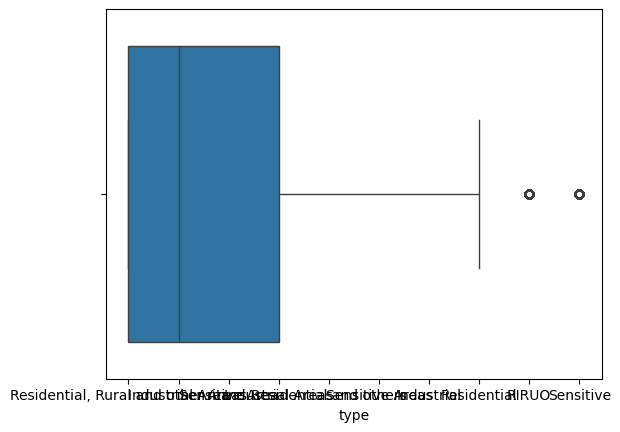

In [ ]:
sns.boxplot(data=ds, x='type')

**HISTOGRAM**

<Axes: xlabel='Count', ylabel='type'>

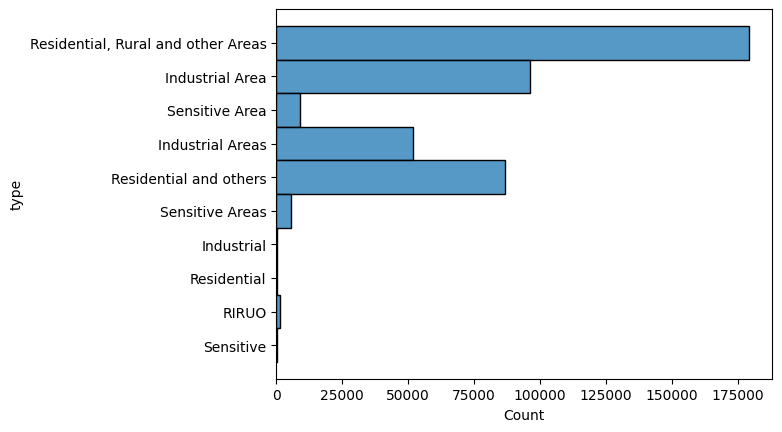

In [ ]:
sns.histplot(data=ds, y='type')


**SINGLE LINE**

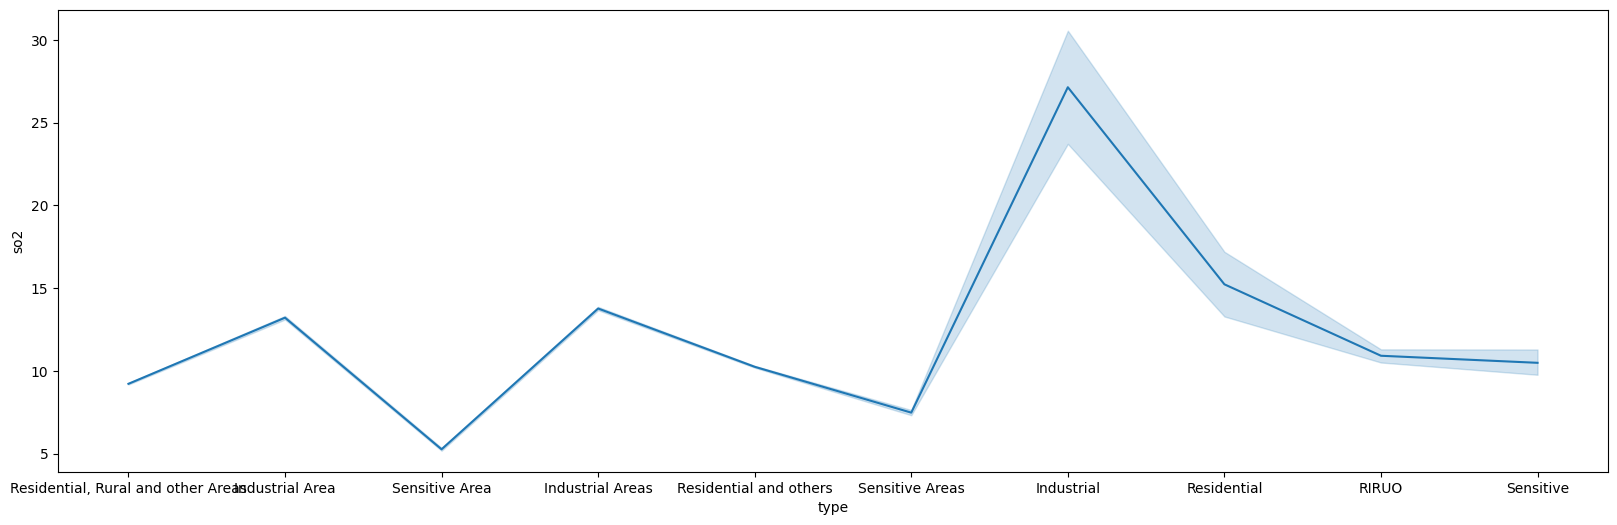

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(data=ds, x='type',y='so2')
plt.show()

**MULTIPLE LINE**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


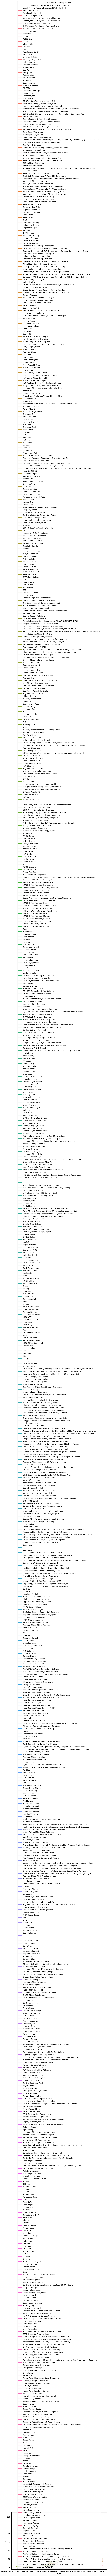

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=ds, x='type',y ='so2',hue='location_monitoring_station')
plt.show()